## Group Assignment # 2

Our project proposal looks at the correlation between proximity to freeways and hospitalization rates. In addition to looking at pollutants and hospitalization rates as they relate to their proximity near the frewway, we wanted to look at additional factors contributing to living near or away from a freeway. For that we need to look at demographics, so for this assignment, I will be looking at the household income profile in Los Angeles County from 2015 to 2019, according to the U.S. Census Bureau. 

Author: Nour Aboufadel

First, I will uplpad the following libraries to my notebook: pandas, geopandas, contextily, and matplot.

In [2]:
import pandas as pd

In [3]:
import geopandas as gpd

In [4]:
import contextily as ctx

In [5]:
import matplotlib.pyplot as plt

Second, I will import my data in Geojson format. 

In [6]:
gdf = gpd.read_file('acs2019_5yr_B19001_14000US06037407102.geojson')

Now, I want to take a look at my data and explore it.

In [7]:
gdf.shape

(2349, 37)

So, this data has 2349 rows and 37 columns. To take a look at what these rows and columns are, I will use the gdf.head() code. 

In [8]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,01000US,United States,120756048.0,236892.0,7302871.0,18046.0,5189583.0,15224.0,5300624.0,15337.0,...,51444.0,11019036.0,49867.0,7267775.0,40108.0,8173563.0,49077.0,9264390.0,54033.0,"MULTIPOLYGON (((-168.22527 -14.53591, -168.199..."
1,04000US06,California,13044266.0,20333.0,628526.0,6274.0,534197.0,5466.0,472128.0,5295.0,...,8232.0,1264447.0,7898.0,904574.0,7380.0,1164827.0,8926.0,1586051.0,10523.0,"MULTIPOLYGON (((-124.13656 41.46445, -124.1378..."
2,05000US06037,"Los Angeles County, CA",3316795.0,5782.0,185622.0,3065.0,157633.0,2635.0,135556.0,2423.0,...,4079.0,310236.0,3564.0,213893.0,2732.0,258815.0,3306.0,338330.0,4049.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
3,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,...,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
4,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,...,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."


In order to look at all my columns, I will use the 'display max' code.

In [9]:
gdf.geoid.head()

0               01000US
1             04000US06
2          05000US06037
3    14000US06037101110
4    14000US06037101122
Name: geoid, dtype: object

In [10]:
gdf=gdf.drop([0])

In [11]:
gdf.geoid.head()

1             04000US06
2          05000US06037
3    14000US06037101110
4    14000US06037101122
5    14000US06037101210
Name: geoid, dtype: object

In [12]:
gdf=gdf.drop([1])

In [13]:
gdf.geoid.head()

2          05000US06037
3    14000US06037101110
4    14000US06037101122
5    14000US06037101210
6    14000US06037101220
Name: geoid, dtype: object

In [14]:
gdf=gdf.drop([2])

In [15]:
gdf.geoid.head()

3    14000US06037101110
4    14000US06037101122
5    14000US06037101210
6    14000US06037101220
7    14000US06037101300
Name: geoid, dtype: object

In [16]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [17]:
gdf.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",B19001005,"B19001005, Error",B19001006,"B19001006, Error",B19001007,"B19001007, Error",B19001008,"B19001008, Error",B19001009,"B19001009, Error",B19001010,"B19001010, Error",B19001011,"B19001011, Error",B19001012,"B19001012, Error",B19001013,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
3,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,90.0,86.0,71.0,91.0,65.0,101.0,68.0,44.0,41.0,55.0,45.0,78.0,67.0,67.0,56.0,46.0,37.0,99.0,53.0,99.0,56.0,107.0,56.0,274.0,103.0,151.0,60.0,75.0,48.0,125.0,73.0,77.0,40.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
4,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,63.0,66.0,52.0,21.0,22.0,0.0,12.0,47.0,48.0,36.0,43.0,25.0,27.0,7.0,11.0,0.0,12.0,52.0,52.0,34.0,25.0,166.0,90.0,298.0,116.0,119.0,63.0,146.0,73.0,115.0,55.0,180.0,74.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
5,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,98.0,271.0,127.0,135.0,69.0,278.0,112.0,39.0,41.0,108.0,76.0,169.0,109.0,112.0,74.0,53.0,47.0,178.0,96.0,163.0,78.0,165.0,79.0,261.0,119.0,148.0,96.0,106.0,65.0,53.0,51.0,58.0,59.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
6,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,57.0,85.0,53.0,128.0,59.0,124.0,64.0,57.0,41.0,35.0,31.0,94.0,53.0,83.0,42.0,107.0,56.0,83.0,56.0,84.0,43.0,63.0,35.0,122.0,59.0,114.0,51.0,68.0,44.0,69.0,47.0,41.0,32.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
7,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,93.0,78.0,50.0,18.0,19.0,59.0,60.0,33.0,26.0,68.0,48.0,33.0,42.0,17.0,19.0,83.0,56.0,32.0,26.0,86.0,50.0,147.0,65.0,195.0,71.0,137.0,59.0,122.0,47.0,159.0,72.0,178.0,77.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Now I see all 37 columns. 

Looking at the data types:

In [18]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2346 entries, 3 to 2348
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2346 non-null   object  
 1   name              2346 non-null   object  
 2   B19001001         2346 non-null   float64 
 3   B19001001, Error  2346 non-null   float64 
 4   B19001002         2346 non-null   float64 
 5   B19001002, Error  2346 non-null   float64 
 6   B19001003         2346 non-null   float64 
 7   B19001003, Error  2346 non-null   float64 
 8   B19001004         2346 non-null   float64 
 9   B19001004, Error  2346 non-null   float64 
 10  B19001005         2346 non-null   float64 
 11  B19001005, Error  2346 non-null   float64 
 12  B19001006         2346 non-null   float64 
 13  B19001006, Error  2346 non-null   float64 
 14  B19001007         2346 non-null   float64 
 15  B19001007, Error  2346 non-null   float64 
 16  B19001008       

Now I want to identify my columns.

In [19]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001001, Error',
 'B19001002',
 'B19001002, Error',
 'B19001003',
 'B19001003, Error',
 'B19001004',
 'B19001004, Error',
 'B19001005',
 'B19001005, Error',
 'B19001006',
 'B19001006, Error',
 'B19001007',
 'B19001007, Error',
 'B19001008',
 'B19001008, Error',
 'B19001009',
 'B19001009, Error',
 'B19001010',
 'B19001010, Error',
 'B19001011',
 'B19001011, Error',
 'B19001012',
 'B19001012, Error',
 'B19001013',
 'B19001013, Error',
 'B19001014',
 'B19001014, Error',
 'B19001015',
 'B19001015, Error',
 'B19001016',
 'B19001016, Error',
 'B19001017',
 'B19001017, Error',
 'geometry']

Based on my metadata.json, I know which columns I need to keep.

In [20]:
columns_to_keep = ['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [21]:
gdf = gdf[columns_to_keep]

In [22]:
gdf.head()

,geoid,name,B19001001,B19001002,B19001003,B19001004,B19001005,B19001006,B19001007,B19001008,B19001009,B19001010,B19001011,B19001012,B19001013,B19001014,B19001015,B19001016,B19001017,geometry
3,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
4,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
5,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
6,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
7,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


Based on the information from my metadat.json, I will rename my columns.

In [23]:
list(gdf)

['geoid',
 'name',
 'B19001001',
 'B19001002',
 'B19001003',
 'B19001004',
 'B19001005',
 'B19001006',
 'B19001007',
 'B19001008',
 'B19001009',
 'B19001010',
 'B19001011',
 'B19001012',
 'B19001013',
 'B19001014',
 'B19001015',
 'B19001016',
 'B19001017',
 'geometry']

In [24]:
gdf.columns=['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [25]:
gdf.head()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
3,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1575.0,86.0,91.0,101.0,44.0,55.0,78.0,67.0,46.0,99.0,99.0,107.0,274.0,151.0,75.0,125.0,77.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
4,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1312.0,66.0,21.0,0.0,47.0,36.0,25.0,7.0,0.0,52.0,34.0,166.0,298.0,119.0,146.0,115.0,180.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
5,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2297.0,271.0,135.0,278.0,39.0,108.0,169.0,112.0,53.0,178.0,163.0,165.0,261.0,148.0,106.0,53.0,58.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
6,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1357.0,85.0,128.0,124.0,57.0,35.0,94.0,83.0,107.0,83.0,84.0,63.0,122.0,114.0,68.0,69.0,41.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
7,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1445.0,78.0,18.0,59.0,33.0,68.0,33.0,17.0,83.0,32.0,86.0,147.0,195.0,137.0,122.0,159.0,178.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


I want to check if my columns add up.

In [26]:
random_tract=gdf.sample()
random_tract

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry
2301,14000US06037920303,"Census Tract 9203.03, Los Angeles, CA",622.0,59.0,16.0,6.0,24.0,6.0,6.0,34.0,6.0,19.0,12.0,68.0,76.0,83.0,35.0,55.0,117.0,"MULTIPOLYGON (((-118.67056 34.36069, -118.6703..."


In [27]:
random_tract.iloc[0]['Total']

622.0

In [28]:
print(random_tract.iloc[0]['Less than $10,000'] + 
      random_tract.iloc[0]['$10,000 to $14,999'] + 
      random_tract.iloc[0]['$15,000 to $19,999'] + 
      random_tract.iloc[0]['$20,000 to $24,999'] + 
      random_tract.iloc[0]['$25,000 to $29,999'] + 
      random_tract.iloc[0]['$30,000 to $34,999'] + 
      random_tract.iloc[0]['$35,000 to $39,999'] + 
      random_tract.iloc[0]['$40,000 to $44,999'] +
      random_tract.iloc[0]['$45,000 to $49,999'] +
      random_tract.iloc[0]['$50,000 to $59,999'] +
      random_tract.iloc[0]['$60,000 to $74,999'] +
      random_tract.iloc[0]['$75,000 to $99,999'] +
      random_tract.iloc[0]['$100,000 to $124,999'] +
      random_tract.iloc[0]['$125,000 to $149,999'] +
      random_tract.iloc[0]['$150,000 to $199,999'] +
      random_tract.iloc[0]['$200,000 or more'])

622.0


Performing simple statistics and plots: 

In [29]:
gdf['Total'].head()

3    1575.0
4    1312.0
5    2297.0
6    1357.0
7    1445.0
Name: Total, dtype: float64

In [30]:
gdf['Total'].describe()

count    2346.000000
mean     1413.808610
std       616.966186
min         0.000000
25%      1011.250000
50%      1339.000000
75%      1728.000000
max      5663.000000
Name: Total, dtype: float64

<AxesSubplot:ylabel='Frequency'>

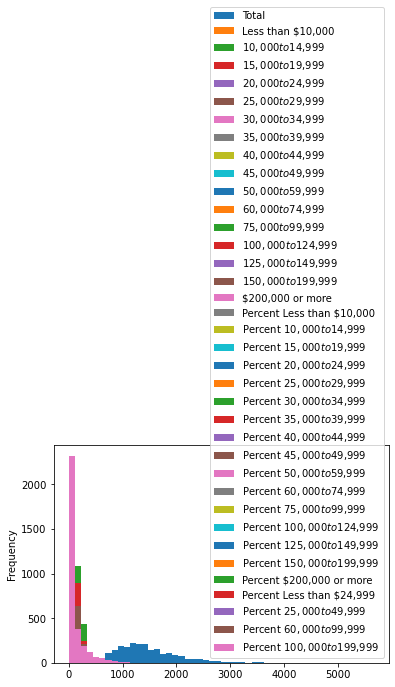

In [52]:
gdf.plot.hist(bins=50)

Now I want to sort my data by total population

In [32]:
gdf_sorted = gdf.sort_values(by='Total',ascending= False)

In [33]:
gdf_sorted[['geoid','Total']].head(5)

,geoid,Total
925,14000US06037275602,5663.0
2149,14000US06037702901,5537.0
2109,14000US06037700200,4541.0
549,14000US06037207900,4204.0
2110,14000US06037700300,4033.0


### Plot it

<AxesSubplot:>

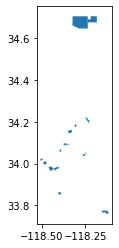

In [34]:
gdf_sorted.head(20).plot()

<AxesSubplot:>

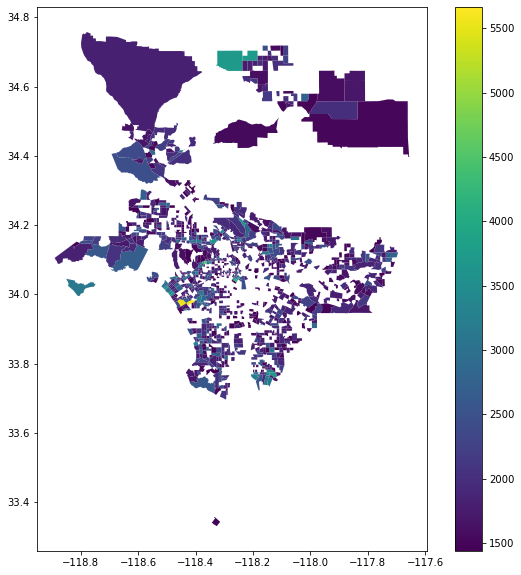

In [35]:
gdf_sorted.head(1000).plot(figsize=(10,10),column= 'Total', legend = True) 

In [53]:
gdf_no_pop = gdf[gdf['Total'] ==0]

In [37]:
print('There are' + str(len(gdf_no_pop)) + 'census tracts with no people in them')

There are27census tracts with no people in them


### Normalize data

Present data as percentage

In [38]:
list(gdf)

['geoid',
 'name',
 'Total',
 'Less than $10,000',
 '$10,000 to $14,999',
 '$15,000 to $19,999',
 '$20,000 to $24,999',
 '$25,000 to $29,999',
 '$30,000 to $34,999',
 '$35,000 to $39,999',
 '$40,000 to $44,999',
 '$45,000 to $49,999',
 '$50,000 to $59,999',
 '$60,000 to $74,999',
 '$75,000 to $99,999',
 '$100,000 to $124,999',
 '$125,000 to $149,999',
 '$150,000 to $199,999',
 '$200,000 or more',
 'geometry']

In [39]:
gdf['Percent Less than $10,000'] = gdf['Less than $10,000']/gdf['Total']*100
gdf['Percent $10,000 to $14,999'] = gdf['$10,000 to $14,999']/gdf['Total']*100
gdf['Percent $15,000 to $19,999'] = gdf['$15,000 to $19,999']/gdf['Total']*100
gdf['Percent $20,000 to $24,999'] = gdf['$20,000 to $24,999']/gdf['Total']*100 
gdf['Percent $25,000 to $29,999'] = gdf['$25,000 to $29,999']/gdf['Total']*100 
gdf['Percent $30,000 to $34,999'] = gdf['$30,000 to $34,999']/gdf['Total']*100
gdf['Percent $35,000 to $39,999'] = gdf['$35,000 to $39,999']/gdf['Total']*100
gdf['Percent $40,000 to $44,999'] = gdf['$40,000 to $44,999']/gdf['Total']*100
gdf['Percent $45,000 to $49,999'] = gdf['$45,000 to $49,999']/gdf['Total']*100
gdf['Percent $50,000 to $59,999'] = gdf['$50,000 to $59,999']/gdf['Total']*100
gdf['Percent $60,000 to $74,999'] = gdf['$60,000 to $74,999']/gdf['Total']*100  
gdf['Percent $75,000 to $99,999'] = gdf['$75,000 to $99,999']/gdf['Total']*100
gdf['Percent $100,000 to $124,999'] = gdf['$100,000 to $124,999']/gdf['Total']*100
gdf['Percent $125,000 to $149,999'] = gdf['$125,000 to $149,999']/gdf['Total']*100
gdf['Percent $150,000 to $199,999'] = gdf['$150,000 to $199,999']/gdf['Total']*100  
gdf['Percent $200,000 or more'] = gdf['$200,000 or more']/gdf['Total']*100

In [40]:
gdf.sample()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more"
749,14000US06037234000,"Census Tract 2340, Los Angeles, CA",2032.0,220.0,154.0,27.0,62.0,80.0,133.0,102.0,74.0,100.0,103.0,175.0,193.0,155.0,158.0,194.0,102.0,"MULTIPOLYGON (((-118.32752 34.01968, -118.3251...",10.826772,7.57874,1.32874,3.051181,3.937008,6.545276,5.019685,3.641732,4.92126,5.068898,8.612205,9.498031,7.627953,7.775591,9.547244,5.019685


In [41]:
import matplotlib.pyplot as plt

### Map Data

For my map data, I want to show the lowest income and highest income areas in LA City. 

Text(0.5, 1.0, 'Percent Income $200,000 or more')

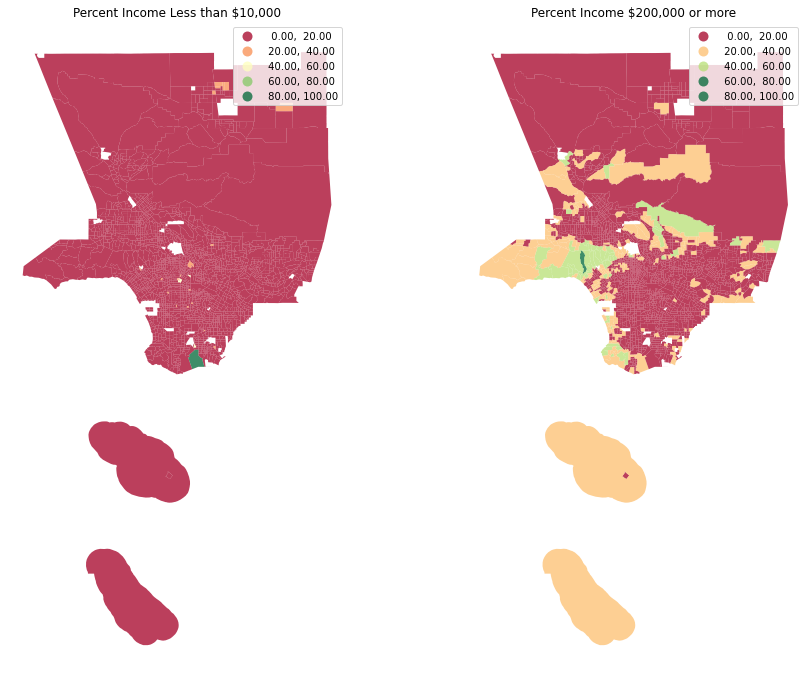

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))


ax1, ax2 = axs

# percent income less than $10,000 on the left
gdf.plot(column='Percent Less than $10,000', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Income Less than $10,000")

# percent income $200,000 or more the right
gdf.plot(column='Percent $200,000 or more', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,60,80,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Income $200,000 or more")

Using the [25,75,50,100] bins does not clearly present the lowest income and highest income areas in LA City. There is alot of overlap in census tracts that have household incomes falling under 200,000 and over 10,000. I want to represent what is the average household income of each census tract and so I will have to combine some of the income ranges.

In [55]:
gdf['Percent Less than $24,999'] = (gdf['Less than $10,000']+gdf['$10,000 to $14,999']+ gdf['$15,000 to $19,999']+gdf['$20,000 to $24,999'])/gdf['Total']*100
gdf['Percent $25,000 to $49,999'] = (gdf['$25,000 to $29,999']+gdf['$30,000 to $34,999']+gdf['$35,000 to $39,999']+gdf['$40,000 to $44,999']+gdf['$45,000 to $49,999'])/gdf['Total']*100 
gdf['Percent $50,000 to $59,999'] = gdf['$50,000 to $59,999']/gdf['Total']*100
gdf['Percent $60,000 to $99,999'] = (gdf['$60,000 to $74,999']+gdf['$75,000 to $99,999'])/gdf['Total']*100  
gdf['Percent $100,000 to $199,999'] = (gdf['$100,000 to $124,999']+gdf['$125,000 to $149,999']+gdf['$150,000 to $199,999'])/gdf['Total']*100
gdf['Percent $200,000 or more'] = gdf['$200,000 or more']/gdf['Total']*100

In [56]:
gdf.sample()

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $24,999","Percent $25,000 to $49,999","Percent $60,000 to $99,999","Percent $100,000 to $199,999"
577,14000US06037209820,"Census Tract 2098.20, Los Angeles, CA",823.0,54.0,89.0,98.0,99.0,55.0,43.0,86.0,53.0,25.0,51.0,47.0,63.0,14.0,12.0,17.0,17.0,"MULTIPOLYGON (((-118.28040 34.04819, -118.2806...",6.561361,10.814095,11.907655,12.029162,6.682868,5.224787,10.449575,6.439854,3.037667,6.196841,5.710814,7.654921,1.701094,1.45808,2.065614,2.065614,41.312272,31.834751,13.365735,5.224787


I chose the following ranges, based on the median income in California:  

    - Less than 24,999 = 20th percentile
    
    - 25,000 - 49,999 = 40th percentile
    
    - 50,000 - 59,000 = median 
    
    - 100,000 - 199,999 
    
    - 200,000 or more = 90th percentile

Text(0.5, 1.0, 'Percent Income $200,000 or more')

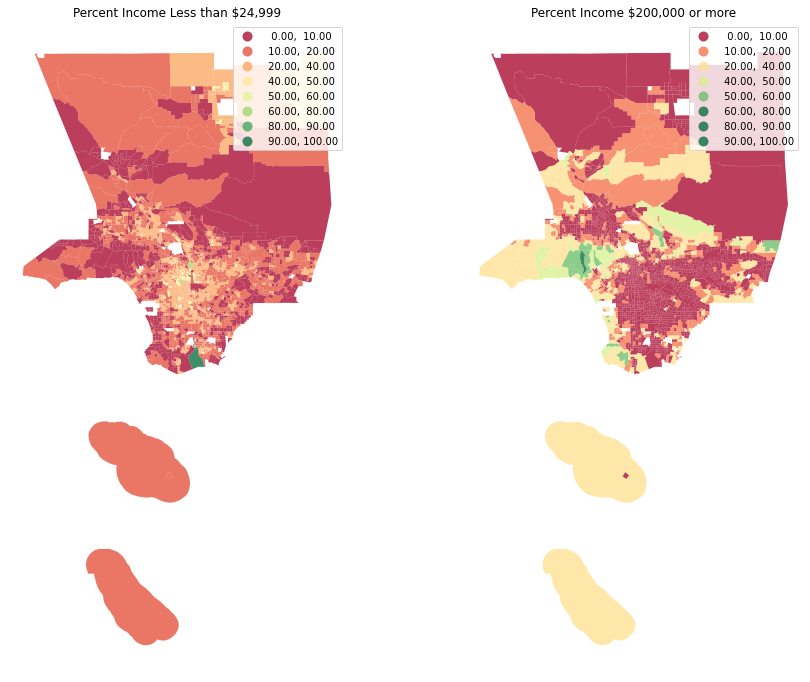

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))


ax1, ax2 = axs

# percent income less than $10,000 on the left
gdf.plot(column='Percent Less than $24,999', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[20,40,5,60,80,90,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Income Less than $24,999")

# percent income $200,000 or more the right
gdf.plot(column='Percent $200,000 or more', 
            cmap='RdYlGn', 
            scheme='user_defined',
            classification_kwds={'bins':[10,20,40,50,60,80,90,100]},
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Income $200,000 or more")

On the left we have a subplot showing where household income is less than 24,999. For this subplot, we need to focus on the areas ranging from green - dark green as the poorest areas in LA City. 

The subplot on the right shows household income of 200,000 of more. For this subplot, we also need to look at the areas ranging from green - dark green as the wealthiest areas in LA City. 

If we we superimpose the two images, we can see that the areas in the left subplot colored dark red (indicating the households with income of 24,999 or less is below 10%) are the same areas shaded in yellow/green on the subplot on the left (indicating the households with income of 200,000 or more is greater than 50%).

### Mapping census tracts with more than 60% of household income less than $24,999.

In [46]:
gdf[gdf['Percent Less than $24,999']> 60]

,geoid,name,Total,"Less than $10,000","$10,000 to $14,999","$15,000 to $19,999","$20,000 to $24,999","$25,000 to $29,999","$30,000 to $34,999","$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more",geometry,"Percent Less than $10,000","Percent $10,000 to $14,999","Percent $15,000 to $19,999","Percent $20,000 to $24,999","Percent $25,000 to $29,999","Percent $30,000 to $34,999","Percent $35,000 to $39,999","Percent $40,000 to $44,999","Percent $45,000 to $49,999","Percent $50,000 to $59,999","Percent $60,000 to $74,999","Percent $75,000 to $99,999","Percent $100,000 to $124,999","Percent $125,000 to $149,999","Percent $150,000 to $199,999","Percent $200,000 or more","Percent Less than $24,999","Percent $25,000 to $49,999","Percent $60,000 to $99,999","Percent $100,000 to $199,999"
539,14000US06037206300,"Census Tract 2063, Los Angeles, CA",2433.0,1266.0,789.0,55.0,83.0,82.0,88.0,0.0,0.0,18.0,0.0,35.0,17.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.25041 34.04326, -118.2490...",52.034525,32.429100,2.260584,3.411426,3.370325,3.616934,0.000000,0.000000,0.739827,0.000000,1.438553,0.698726,0.000000,0.000000,0.0,0.000000,90.135635,7.727086,2.137279,0.000000
686,14000US06037221820,"Census Tract 2218.20, Los Angeles, CA",914.0,398.0,137.0,34.0,9.0,24.0,15.0,20.0,42.0,0.0,27.0,80.0,66.0,23.0,0.0,0.0,39.0,"MULTIPOLYGON (((-118.28882 34.03276, -118.2874...",43.544858,14.989059,3.719912,0.984683,2.625821,1.641138,2.188184,4.595186,0.000000,2.954048,8.752735,7.221007,2.516411,0.000000,0.0,4.266958,63.238512,11.050328,15.973742,2.516411
694,14000US06037222700,"Census Tract 2227, Los Angeles, CA",135.0,70.0,9.0,10.0,0.0,4.0,9.0,4.0,0.0,0.0,5.0,0.0,8.0,16.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.29154 34.02550, -118.2912...",51.851852,6.666667,7.407407,0.000000,2.962963,6.666667,2.962963,0.000000,0.000000,3.703704,0.000000,5.925926,11.851852,0.000000,0.0,0.000000,65.925926,12.592593,5.925926,11.851852
703,14000US06037224700,"Census Tract 2247, Los Angeles, CA",949.0,431.0,78.0,61.0,47.0,27.0,55.0,14.0,11.0,33.0,55.0,33.0,39.0,32.0,17.0,0.0,16.0,"MULTIPOLYGON (((-118.28391 34.02389, -118.2838...",45.416228,8.219178,6.427819,4.952582,2.845100,5.795574,1.475237,1.159115,3.477345,5.795574,3.477345,4.109589,3.371970,1.791359,0.0,1.685985,65.015806,14.752371,7.586934,5.163330
820,14000US06037242100,"Census Tract 2421, Los Angeles, CA",751.0,189.0,153.0,86.0,50.0,67.0,74.0,33.0,0.0,17.0,13.0,16.0,28.0,10.0,0.0,0.0,15.0,"MULTIPOLYGON (((-118.23675 33.94491, -118.2367...",25.166445,20.372836,11.451398,6.657790,8.921438,9.853529,4.394141,0.000000,2.263648,1.731025,2.130493,3.728362,1.331558,0.000000,0.0,1.997337,63.648469,25.432756,5.858855,1.331558
823,14000US06037242600,"Census Tract 2426, Los Angeles, CA",1381.0,392.0,230.0,177.0,105.0,49.0,56.0,76.0,47.0,56.0,69.0,52.0,24.0,26.0,22.0,0.0,0.0,"MULTIPOLYGON (((-118.25425 33.93097, -118.2542...",28.385228,16.654598,12.816799,7.603186,3.548154,4.055033,5.503259,3.403331,4.055033,4.996379,3.765387,1.737871,1.882694,1.593049,0.0,0.000000,65.459812,20.564808,5.503259,3.475742
1869,14000US06037572800,"Census Tract 5728, Los Angeles, CA",226.0,94.0,22.0,52.0,4.0,0.0,0.0,0.0,4.0,11.0,14.0,0.0,5.0,11.0,9.0,0.0,0.0,"MULTIPOLYGON (((-118.22751 33.79037, -118.2273...",41.592920,9.734513,23.008850,1.769912,0.000000,0.000000,0.000000,1.769912,4.867257,6.194690,0.000000,2.212389,4.867257,3.982301,0.0,0.000000,76.106195,6.637168,2.212389,8.849558
1908,14000US06037575500,"Census Tract 5755, Los Angeles, CA",41.0,0.0,24.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.22751 33.79037, -118.2274...",0.000000,58.536585,31.707317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.756098,0.000000,0.000000,0.000000,0.0,0.000000,90.243902,0.000000,9.756098,0.000000
2329,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",56.0,1

<AxesSubplot:>

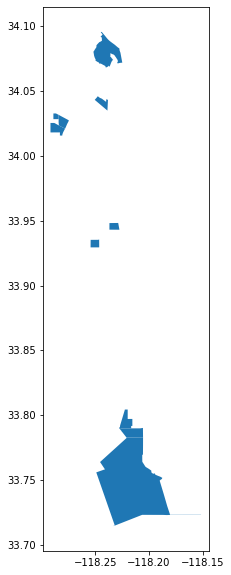

In [47]:
gdf[gdf['Percent Less than $24,999'] >60].plot(figsize=(12,10))

Add basemap

In [48]:
gdf_web_mercator= gdf.to_crs(epsg=3857)

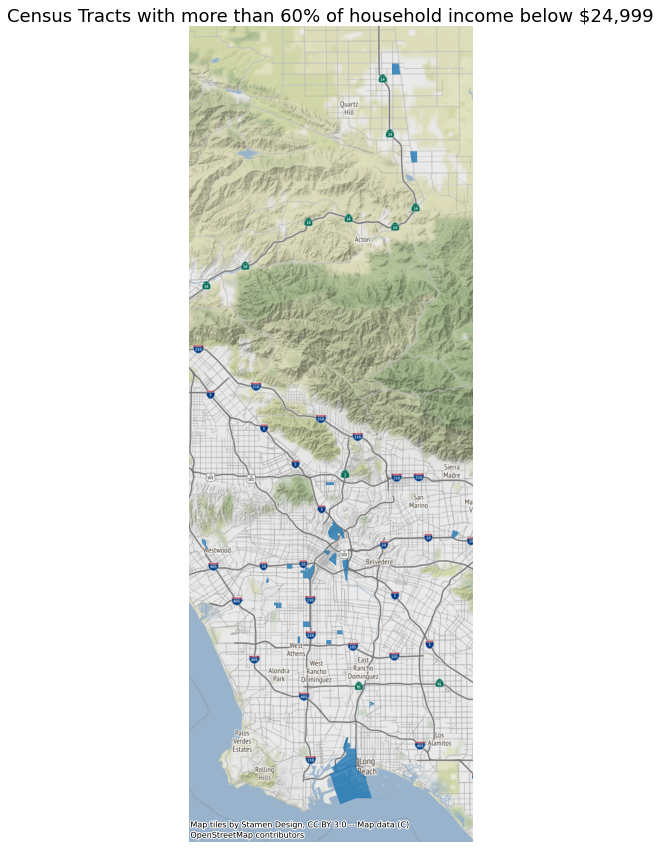

In [49]:
fig, ax = plt.subplots(figsize=(12, 15))

gdf_web_mercator[gdf_web_mercator['Percent Less than $24,999'] > 50].plot(ax=ax, alpha=0.80)

ax.axis('off')

ax.set_title('Census Tracts with more than 60% of household income below $24,999',fontsize=18)

ctx.add_basemap(ax)